Credit Score Prediction

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

Importing Dataset

In [2]:
data_train = pd.read_csv("dataset.csv")

In [3]:
data_train.head()

,ID,CustomerID,Month,Name,Age,SSN,Occupation,AnnualIncome,MonthlyInhandSalary,NumBankAccounts,...,CreditMix,OutstandingDebt,CreditUtilizationRatio,CreditHistoryAge,PaymentofMinAmount,TotalEMIpermonth,Amountinvestedmonthly,PaymentBehaviour,MonthlyBalance,CreditScore
0,0x1602,CUS0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,NaN,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.415295,HighspentSmallvaluepayments,312.494089,Good
1,0x1603,CUS0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.280222,LowspentLargevaluepayments,284.629163,Good
2,0x1604,CUS0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521,LowspentMediumvaluepayments,331.209863,Good
3,0x1605,CUS0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.458074,LowspentSmallvaluepayments,223.451310,Good
4,0x1606,CUS0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153,HighspentMediumvaluepayments,341.489231,Good


Information about Dataset

In [4]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   ID                      100000 non-null  object 
 1   CustomerID              100000 non-null  object 
 2   Month                   100000 non-null  object 
 3   Name                    90015 non-null   object 
 4   Age                     100000 non-null  int64  
 5   SSN                     100000 non-null  object 
 6   Occupation              92938 non-null   object 
 7   AnnualIncome            100000 non-null  float64
 8   MonthlyInhandSalary     84998 non-null   float64
 9   NumBankAccounts         100000 non-null  int64  
 10  NumCreditCard           100000 non-null  int64  
 11  InterestRate            100000 non-null  int64  
 12  NumofLoan               100000 non-null  int64  
 13  TypeofLoan              88592 non-null   object 
 14  Delayfromduedate     

Mean, Median, Variance, Standard Deviation, and Central Tendancy

In [5]:
data_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,100000.0,1.106497e+02,6.862447e+02,-5.000000e+02,24.000000,33.000000,42.000000,8.698000e+03
AnnualIncome,100000.0,1.764157e+05,1.429618e+06,7.005930e+03,19457.500000,37578.610000,72790.920000,2.419806e+07
MonthlyInhandSalary,84998.0,4.194171e+03,3.183686e+03,3.036454e+02,1625.568229,3093.745000,5957.448333,1.520463e+04
NumBankAccounts,100000.0,1.709128e+01,1.174048e+02,-1.000000e+00,3.000000,6.000000,7.000000,1.798000e+03
NumCreditCard,100000.0,2.247443e+01,1.290574e+02,0.000000e+00,4.000000,5.000000,7.000000,1.499000e+03
InterestRate,100000.0,7.246604e+01,4.664226e+02,1.000000e+00,8.000000,13.000000,20.000000,5.797000e+03
NumofLoan,100000.0,3.009960e+00,6.264788e+01,-1.000000e+02,1.000000,3.000000,5.000000,1.496000e+03
Delayfromduedate,100000.0,2.106878e+01,1.486010e+01,-5.000000e+00,10.000000,18.000000,28.000000,6.700000e+01
NumofDelayedPayment,92998.0,3.092334e+01,2.260319e+02,-3.000000e+00,9.000000,14.000000,18.000000,4.397000e+03
ChangedCreditLimit,97909.0,1.038903e+01,6.789496e+00,-6.490000e+00,5.320000,9.400000,14.870000,3.697000e+01


Null Values Handling

In [6]:
data_train.isnull().sum()

,0
ID,0
CustomerID,0
Month,0
Name,9985
Age,0
SSN,0
Occupation,7062
AnnualIncome,0
MonthlyInhandSalary,15002
NumBankAccounts,0


** ID,SSN,Name, CustomerID will not contribute to the credit score, and are unique to each data point. Let's drop these columns **

In [7]:
data_train = data_train.drop(['ID', 'SSN', 'Name', 'CustomerID'], axis = 1)

In [8]:

data_train.isnull().sum()

,0
Month,0
Age,0
Occupation,7062
AnnualIncome,0
MonthlyInhandSalary,15002
NumBankAccounts,0
NumCreditCard,0
InterestRate,0
NumofLoan,0
TypeofLoan,11408



Occupation, TypeofLoan need to be dropped owing to the number of missing values

In [9]:
data_train = data_train.drop(['TypeofLoan', 'Occupation','Month'], axis = 1)

In [10]:
data_train.isnull().sum()

,0
Age,0
AnnualIncome,0
MonthlyInhandSalary,15002
NumBankAccounts,0
NumCreditCard,0
InterestRate,0
NumofLoan,0
Delayfromduedate,0
NumofDelayedPayment,7002
ChangedCreditLimit,2091


The rest of the features contribute to the credit score according to this domain. So, rather than dropping the feature, lets remove the datapoints that have null values

In [11]:
data_train = data_train.dropna()

In [12]:
data_train.isna().sum()

,0
Age,0
AnnualIncome,0
MonthlyInhandSalary,0
NumBankAccounts,0
NumCreditCard,0
InterestRate,0
NumofLoan,0
Delayfromduedate,0
NumofDelayedPayment,0
ChangedCreditLimit,0


Handling Categorical Data

In [14]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51930 entries, 6 to 99999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     51930 non-null  int64  
 1   AnnualIncome            51930 non-null  float64
 2   MonthlyInhandSalary     51930 non-null  float64
 3   NumBankAccounts         51930 non-null  int64  
 4   NumCreditCard           51930 non-null  int64  
 5   InterestRate            51930 non-null  int64  
 6   NumofLoan               51930 non-null  int64  
 7   Delayfromduedate        51930 non-null  int64  
 8   NumofDelayedPayment     51930 non-null  float64
 9   ChangedCreditLimit      51930 non-null  float64
 10  NumCreditInquiries      51930 non-null  float64
 11  CreditMix               51930 non-null  object 
 12  OutstandingDebt         51930 non-null  float64
 13  CreditUtilizationRatio  51930 non-null  float64
 14  CreditHistoryAge        51930 non-null  obj

In [15]:
Categorical_features = ['CreditMix','CreditHistoryAge','PaymentofMinAmount','PaymentBehaviour','CreditScore']

In [16]:

data_train[Categorical_features]

,CreditMix,CreditHistoryAge,PaymentofMinAmount,PaymentBehaviour,CreditScore
6,Good,22 Years and 7 Months,No,LowspentSmallvaluepayments,Good
8,Good,26 Years and 7 Months,No,LowspentSmallvaluepayments,Standard
9,Good,26 Years and 8 Months,No,HighspentLargevaluepayments,Good
12,Good,26 Years and 11 Months,No,LowspentSmallvaluepayments,Good
13,Good,27 Years and 0 Months,No,HighspentLargevaluepayments,Good
...,...,...,...,...,...
99986,Bad,5 Years and 10 Months,Yes,LowspentSmallvaluepayments,Poor
99989,Bad,6 Years and 1 Months,Yes,!@9#%8,Standard
99991,Bad,6 Years and 3 Months,Yes,HighspentLargevaluepayments,Standard
99997,Good,31 Years and 8 Months,No,HighspentLargevaluepayments,Poor


In [17]:
for feature in Categorical_features:
    unique_values = data_train[feature].unique()
    print(f"Unique values in {feature}:")
    print(unique_values)

Unique values in CreditMix:
['Good' 'Standard' 'Bad']
Unique values in CreditHistoryAge:
['22 Years and 7 Months' '26 Years and 7 Months' '26 Years and 8 Months'
 '26 Years and 11 Months' '27 Years and 0 Months' '27 Years and 2 Months'
 '17 Years and 9 Months' '17 Years and 10 Months' '18 Years and 1 Months'
 '18 Years and 2 Months' '18 Years and 3 Months' '18 Years and 4 Months'
 '17 Years and 3 Months' '17 Years and 4 Months' '17 Years and 5 Months'
 '17 Years and 6 Months' '17 Years and 7 Months' '30 Years and 10 Months'
 '31 Years and 2 Months' '31 Years and 3 Months' '32 Years and 0 Months'
 '32 Years and 2 Months' '30 Years and 7 Months' '30 Years and 8 Months'
 '30 Years and 9 Months' '30 Years and 11 Months' '21 Years and 4 Months'
 '21 Years and 8 Months' '21 Years and 11 Months' '26 Years and 6 Months'
 '19 Years and 2 Months' '19 Years and 3 Months' '19 Years and 5 Months'
 '19 Years and 6 Months' '19 Years and 7 Months' '19 Years and 8 Months'
 '25 Years and 5 Months' '25 Y

Label Encoding fo the Target Variable
References : https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html

In [18]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data_train['CreditScore'] = le.fit_transform(data_train['CreditScore'])

In [19]:
le.classes_

array(['Good', 'Poor', 'Standard'], dtype=object)

One-Hot Encoding for 'PaymentofMinAmount'

In [20]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse=False, drop='first')
encoded_data = encoder.fit_transform(data_train['PaymentofMinAmount'].values.reshape(-1, 1))

TypeError: OneHotEncoder.__init__() got an unexpected keyword argument 'sparse'

In [21]:
encoded_data_train = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(['PaymentofMinAmount']))
data_train = data_train.reset_index(drop=True) # Resetting the index to avoid issues while concatenating
data_train= pd.concat([data_train, encoded_data_train], axis=1)

NameError: name 'encoded_data' is not defined

'CreditHistoryAge' : Let's replace with the total number of months

In [22]:
data_copy = data_train

In [23]:
def getMonths(duration):
    years, months = int(duration.split()[0]), int(duration.split()[3])
    months += years * 12
    return months

In [24]:
data_copy['CreditHistoryAge'] = data_copy['CreditHistoryAge'].apply(getMonths)

'CreditMix' : Lets use label encoding to this, as there is a inherent relationship between the values

In [25]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data_copy['CreditMix'] = le.fit_transform(data_copy['CreditMix'])

In [26]:
le.classes_

array(['Bad', 'Good', 'Standard'], dtype=object)

'PaymentBehaviour' : Let's use one hot encoding as there is no inherent relationship

In [27]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse=False, drop='first')
encoded_data = encoder.fit_transform(data_copy['PaymentBehaviour'].values.reshape(-1, 1))
encoded_data_train = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(['PaymentBehaviour']))
data_train = data_copy.reset_index(drop=True) # Resetting the index to avoid issues while concatenating
data_train= pd.concat([data_train, encoded_data_train], axis=1)

TypeError: OneHotEncoder.__init__() got an unexpected keyword argument 'sparse'

In [28]:
data_train

,Age,AnnualIncome,MonthlyInhandSalary,NumBankAccounts,NumCreditCard,InterestRate,NumofLoan,Delayfromduedate,NumofDelayedPayment,ChangedCreditLimit,...,CreditMix,OutstandingDebt,CreditUtilizationRatio,CreditHistoryAge,PaymentofMinAmount,TotalEMIpermonth,Amountinvestedmonthly,PaymentBehaviour,MonthlyBalance,CreditScore
6,23,19114.12,1824.843333,3,4,3,4,3,8.0,11.27,...,1,809.98,22.537593,271,No,49.574949,178.344067,LowspentSmallvaluepayments,244.565317,0
8,28,34847.84,3037.986667,2,4,6,1,3,4.0,5.42,...,1,605.03,24.464031,319,No,18.816215,104.291825,LowspentSmallvaluepayments,470.690627,2
9,28,34847.84,3037.986667,2,4,6,1,7,1.0,7.42,...,1,605.03,38.550848,320,No,18.816215,40.391238,HighspentLargevaluepayments,484.591214,0
12,28,34847.84,3037.986667,2,4,6,1,3,1.0,6.42,...,1,605.03,34.977895,323,No,18.816215,130.115420,LowspentSmallvaluepayments,444.867032,0
13,28,34847.84,3037.986667,2,4,6,1,3,0.0,5.42,...,1,605.03,33.381010,324,No,18.816215,43.477190,HighspentLargevaluepayments,481.505262,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99986,28,20002.88,1929.906667,10,8,29,5,33,25.0,18.31,...,0,3571.70,24.713861,70,Yes,60.964772,76.282793,LowspentSmallvaluepayments,345.743101,1
99989,28,20002.88,1929.906667,10,8,29,5,33,25.0,16.31,...,0,3571.70,33.359987,73,Yes,60.964772,74.366603,!@9#%8,307.659291,2
99991,29,20002.88,1929.906667,10,8,29,5,33,25.0,18.31,...,0,3571.70,37.140784,75,Yes,60.964772,34.662906,HighspentLargevaluepayments,337.362988,2
99997,25,39628.99,3359.415833,4,6,5729,2,27,6.0,11.50,...,1,502.38,41.255522,380,No,35.104023,24.028477,HighspentLargevaluepayments,516.809083,1


Dropping the left over categorical values post one hot encoding

In [29]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51930 entries, 6 to 99999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     51930 non-null  int64  
 1   AnnualIncome            51930 non-null  float64
 2   MonthlyInhandSalary     51930 non-null  float64
 3   NumBankAccounts         51930 non-null  int64  
 4   NumCreditCard           51930 non-null  int64  
 5   InterestRate            51930 non-null  int64  
 6   NumofLoan               51930 non-null  int64  
 7   Delayfromduedate        51930 non-null  int64  
 8   NumofDelayedPayment     51930 non-null  float64
 9   ChangedCreditLimit      51930 non-null  float64
 10  NumCreditInquiries      51930 non-null  float64
 11  CreditMix               51930 non-null  int64  
 12  OutstandingDebt         51930 non-null  float64
 13  CreditUtilizationRatio  51930 non-null  float64
 14  CreditHistoryAge        51930 non-null  int

In [30]:
data_train = data_train.drop(['PaymentofMinAmount', 'PaymentBehaviour'], axis = 1)

In [31]:

data_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51930 entries, 6 to 99999
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     51930 non-null  int64  
 1   AnnualIncome            51930 non-null  float64
 2   MonthlyInhandSalary     51930 non-null  float64
 3   NumBankAccounts         51930 non-null  int64  
 4   NumCreditCard           51930 non-null  int64  
 5   InterestRate            51930 non-null  int64  
 6   NumofLoan               51930 non-null  int64  
 7   Delayfromduedate        51930 non-null  int64  
 8   NumofDelayedPayment     51930 non-null  float64
 9   ChangedCreditLimit      51930 non-null  float64
 10  NumCreditInquiries      51930 non-null  float64
 11  CreditMix               51930 non-null  int64  
 12  OutstandingDebt         51930 non-null  float64
 13  CreditUtilizationRatio  51930 non-null  float64
 14  CreditHistoryAge        51930 non-null  int

Done with treating Categorical values

**Checking Dataset Balance**

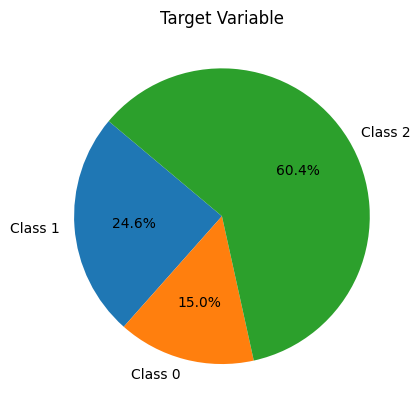

In [32]:
import matplotlib.pyplot as plt

arr_0, arr_1, arr_2 = [], [], []
for i in data_train['CreditScore']:
    if i == 0:
        arr_0.append(i)
    if i == 1:
        arr_1.append(i)
    else:
        arr_2.append(i)

Class_1, Class_0, Class_2 = len(arr_1), len(arr_0), len(arr_2)


plt.pie([Class_1, Class_0, Class_2], labels=['Class 1', 'Class 0', 'Class 2'], autopct='%1.1f%%', startangle=140)
plt.title('Target Variable')
plt.show()

Dataset looks kinda imbalanced. Let's use oversampling to increase the number of datapoints with the classes 0 and 1

In [33]:
data_class_1 = data_train[data_train['CreditScore'] == 1]
data_class_2 = data_train[data_train['CreditScore'] == 2]
data_class_0 = data_train[data_train['CreditScore'] == 0]

data_class_1_oversampled = data_class_1.sample(Class_2, replace=True)
data_class_0_oversampled = data_class_0.sample(Class_2, replace=True)


data_oversampled = pd.concat([data_class_2, data_class_1_oversampled], axis=0)
data_oversampled = pd.concat([data_oversampled, data_class_0_oversampled], axis=0)

Plotting the pie chart post oversampling

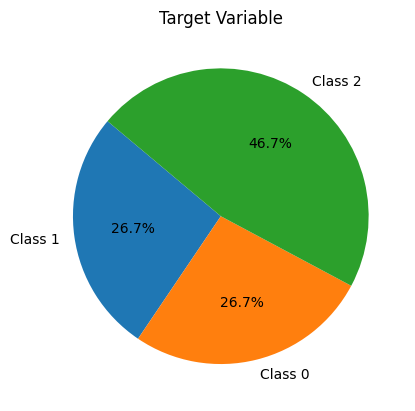

In [34]:
arr_0, arr_1, arr_2 = [], [], []
for i in data_oversampled['CreditScore']:
    if i == 0:
        arr_0.append(i)
    if i == 1:
        arr_1.append(i)
    else:
        arr_2.append(i)

Class_1, Class_0, Class_2 = len(arr_1), len(arr_0), len(arr_2)


plt.pie([Class_1, Class_0, Class_2], labels=['Class 1', 'Class 0', 'Class 2'], autopct='%1.1f%%', startangle=140)
plt.title('Target Variable')
plt.show()

Done with Data Balancing

Text(0.5, 1.0, 'Boxplots for Multiple Columns')

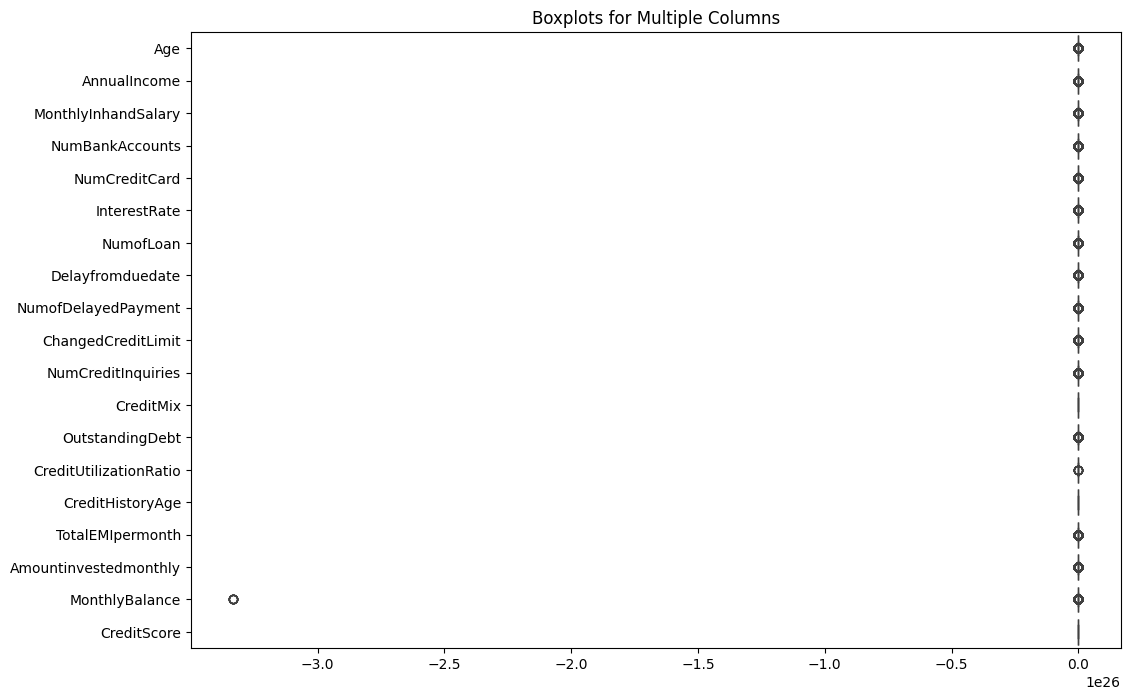

In [35]:
plt.figure(figsize=(12, 8))  # Adjust the figure size as needed

# Use Seaborn to create boxplots for all columns in df
sns.boxplot(data=data_oversampled, orient='h')  # orient='h' for horizontal boxplots
plt.title('Boxplots for Multiple Columns')


There is an outlier in the MonthlyBalance that is effecting this plot. Before we handle it, lets check the skewness of the feature distributions

In [36]:
data_oversampled.info()

<class 'pandas.core.frame.DataFrame'>
Index: 101607 entries, 8 to 51461
Data columns (total 19 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Age                     101607 non-null  int64  
 1   AnnualIncome            101607 non-null  float64
 2   MonthlyInhandSalary     101607 non-null  float64
 3   NumBankAccounts         101607 non-null  int64  
 4   NumCreditCard           101607 non-null  int64  
 5   InterestRate            101607 non-null  int64  
 6   NumofLoan               101607 non-null  int64  
 7   Delayfromduedate        101607 non-null  int64  
 8   NumofDelayedPayment     101607 non-null  float64
 9   ChangedCreditLimit      101607 non-null  float64
 10  NumCreditInquiries      101607 non-null  float64
 11  CreditMix               101607 non-null  int64  
 12  OutstandingDebt         101607 non-null  float64
 13  CreditUtilizationRatio  101607 non-null  float64
 14  CreditHistoryAge        10

# Outlier Removal

In [37]:
df = data_oversampled.drop('CreditScore', axis = 1)

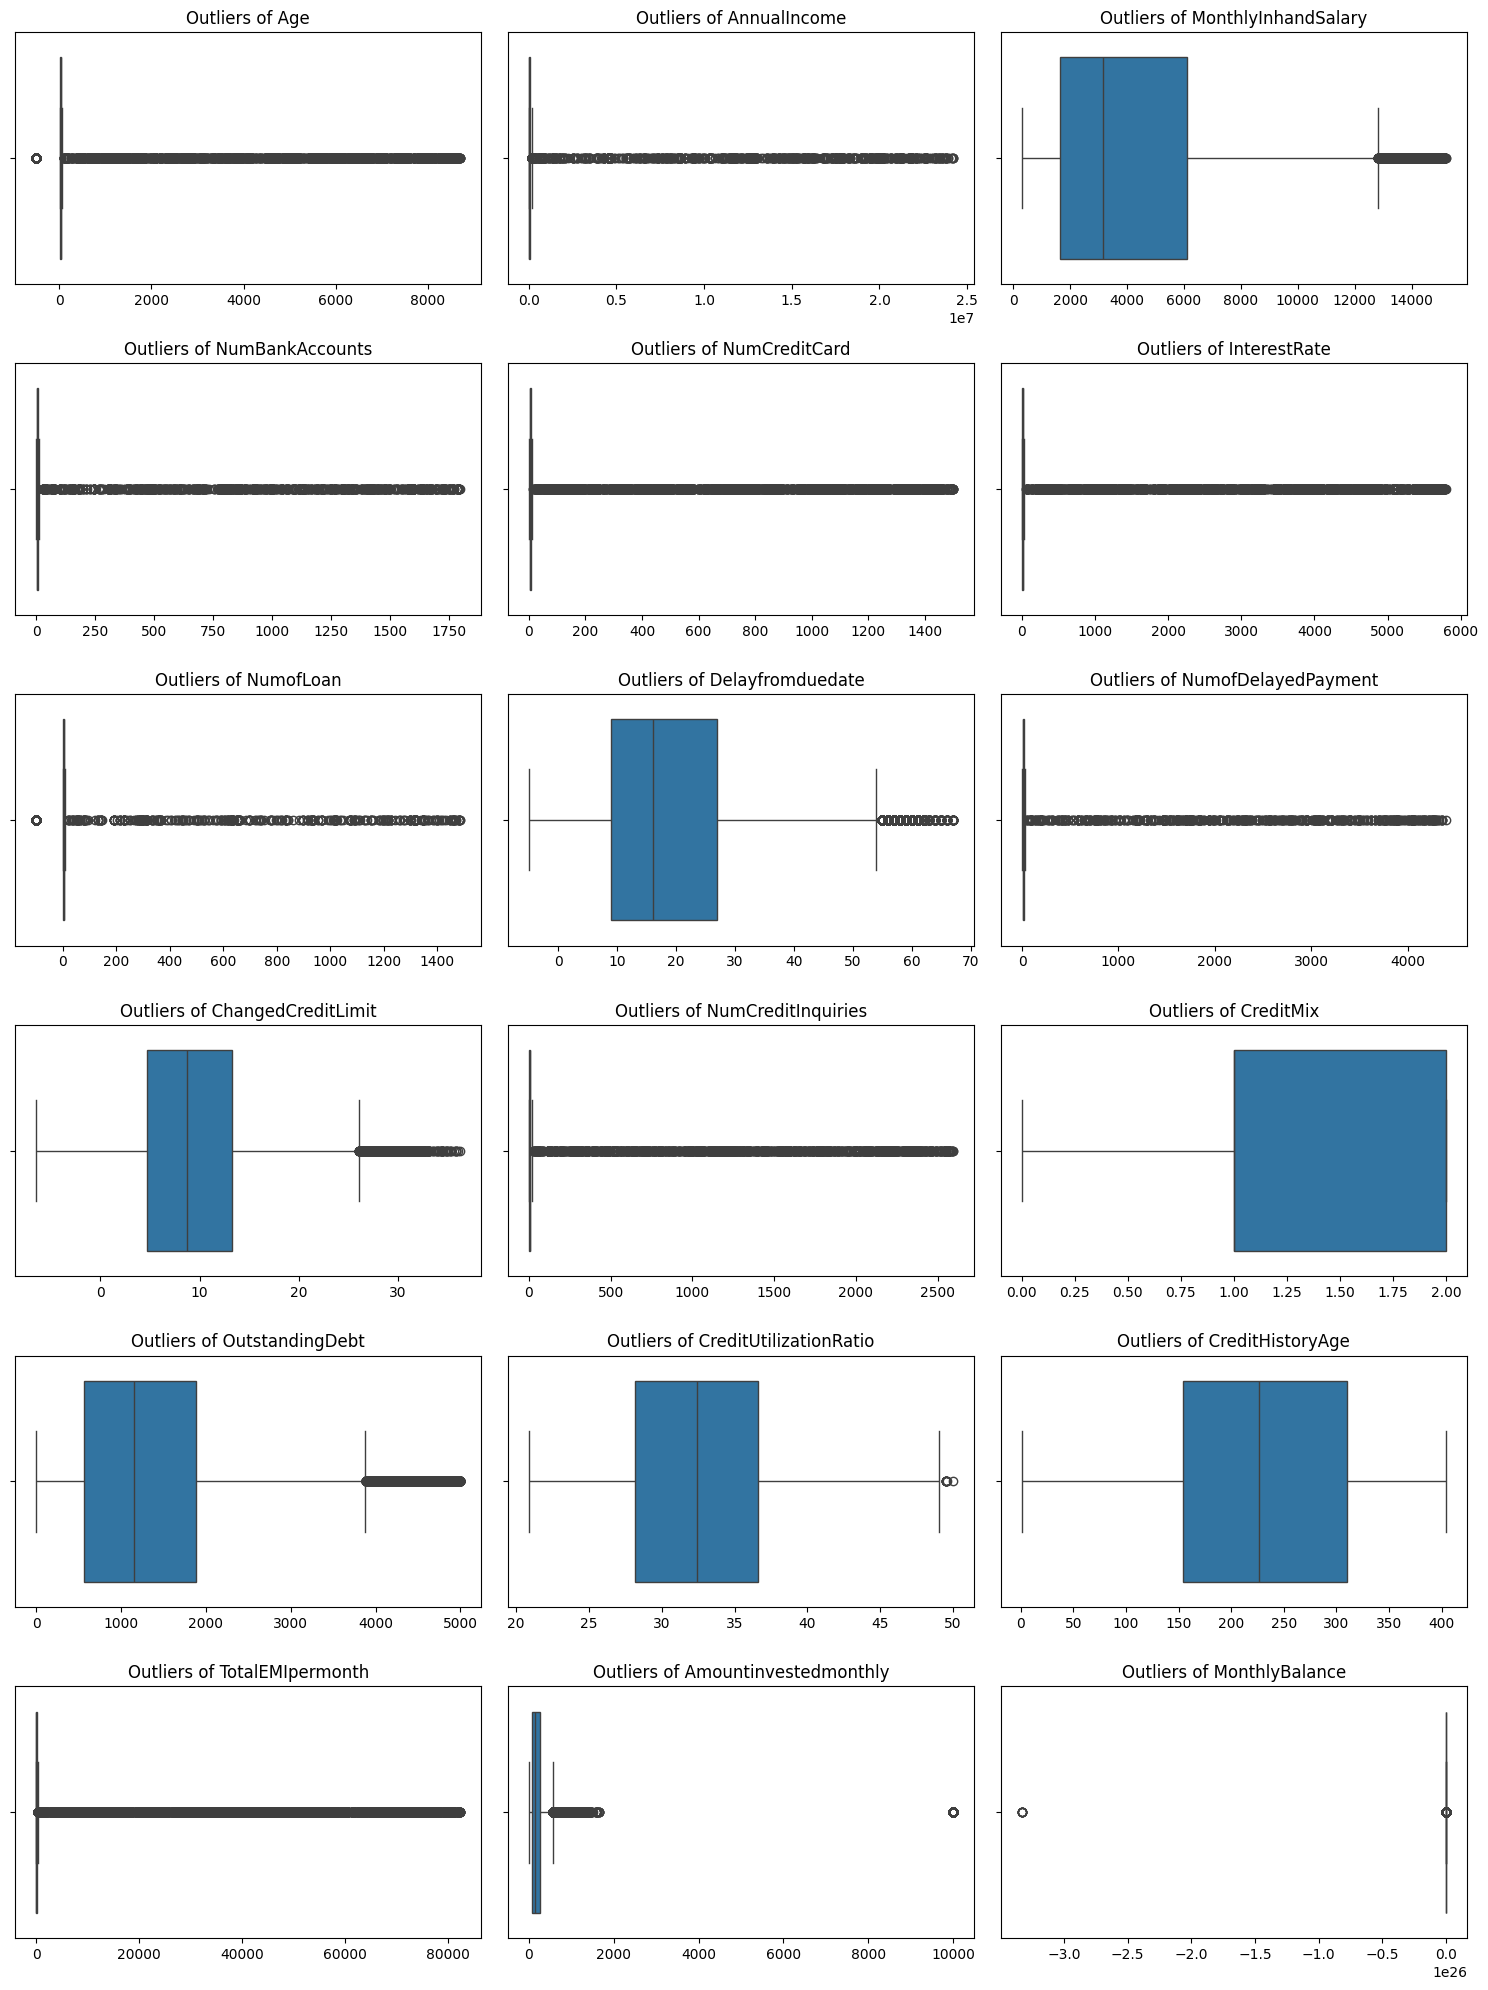

In [38]:
num_cols = 3

num_features = len(df.columns)
num_rows = (num_features - 1) // num_cols + 1

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 20))

# Flattenning the axes
axes = axes.ravel()

i = -1
for feature in df.columns:
    i += 1
    ax = axes[i]
    sns.boxplot(x=df[feature], ax = ax)
    ax.set_title(f'Outliers of {feature}')
    ax.set_xlabel('')
    ax.set_ylabel('')
#     i += 1

#     ax = axes[i]
#     df[feature] = yeojohnson(df[feature])[0]
#     sns.histplot(df[feature], kde=True, ax=ax)
#     ax.set_title(f'Distribution of Transformed {feature}')
#     ax.set_xlabel('')
#     ax.set_ylabel('')

for i in range(num_features, num_cols * num_rows):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

**Adding back the target column after plotting**

In [39]:
df['CreditScore'] = data_oversampled['CreditScore']

In [40]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
# print(IQR)
print(df < (Q1 - 1.5 * IQR) |(df > (Q3 + 1.5 * IQR)))

         Age  AnnualIncome  MonthlyInhandSalary  NumBankAccounts  \
8      False         False                False            False   
22     False         False                False            False   
23     False         False                False            False   
24     False         False                False            False   
25     False         False                False            False   
...      ...           ...                  ...              ...   
30198  False         False                False            False   
89292  False         False                False            False   
95403  False         False                False            False   
56334  False         False                False            False   
51461  False         False                False             True   

       NumCreditCard  InterestRate  NumofLoan  Delayfromduedate  \
8              False         False      False             False   
22             False         False      False    

In [41]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(df < (Q1 - 1.5 * IQR) |(df > (Q3 + 1.5 * IQR)))

         Age  AnnualIncome  MonthlyInhandSalary  NumBankAccounts  \
8      False         False                False            False   
22     False         False                False            False   
23     False         False                False            False   
24     False         False                False            False   
25     False         False                False            False   
...      ...           ...                  ...              ...   
30198  False         False                False            False   
89292  False         False                False            False   
95403  False         False                False            False   
56334  False         False                False            False   
51461  False         False                False             True   

       NumCreditCard  InterestRate  NumofLoan  Delayfromduedate  \
8              False         False      False             False   
22             False         False      False    

We are not removing outliers from the following features in the set, as these outliers contain important information

In [42]:
s = set([
    'PaymentofMinAmount_No',
    'PaymentofMinAmount_Yes',
    'PaymentBehaviour_HighspentLargevaluepayments',
    'PaymentBehaviour_HighspentMediumvaluepayments',
    'PaymentBehaviour_HighspentSmallvaluepayments',
    'PaymentBehaviour_LowspentLargevaluepayments',
    'PaymentBehaviour_LowspentMediumvaluepayments',
    'PaymentBehaviour_LowspentSmallvaluepayments',
    'Age',
    'NumBankAccounts',
    'NumCreditCard',
    'InterestRate',
    'NumofLoan',
    'NumofDelayedPayment',
    'NumCreditInquiries'
])


lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
for column in df.columns:
    if column in s:
        continue
    df = df[(df[column] >= lower_bound[column]) & (df[column] <= upper_bound[column])]

print(df)

       Age  AnnualIncome  MonthlyInhandSalary  NumBankAccounts  NumCreditCard  \
8       28      34847.84          3037.986667                2              4   
24      54      30689.89          2612.490833                2              5   
25      54      30689.89          2612.490833                2              5   
26      55      30689.89          2612.490833                2              5   
27      55      30689.89          2612.490833                2              5   
...    ...           ...                  ...              ...            ...   
81320   34      21709.07          2078.089167                3              4   
30198   20      66022.26          5382.855000                1            523   
89292   52      45749.06          3600.421667                6              5   
95403   27      33604.58          2987.381667                3              6   
56334   36      56340.60          4837.050000                3              1   

       InterestRate  NumofL

AReferences : https://seaborn.pydata.org/generated/seaborn.boxplot.html

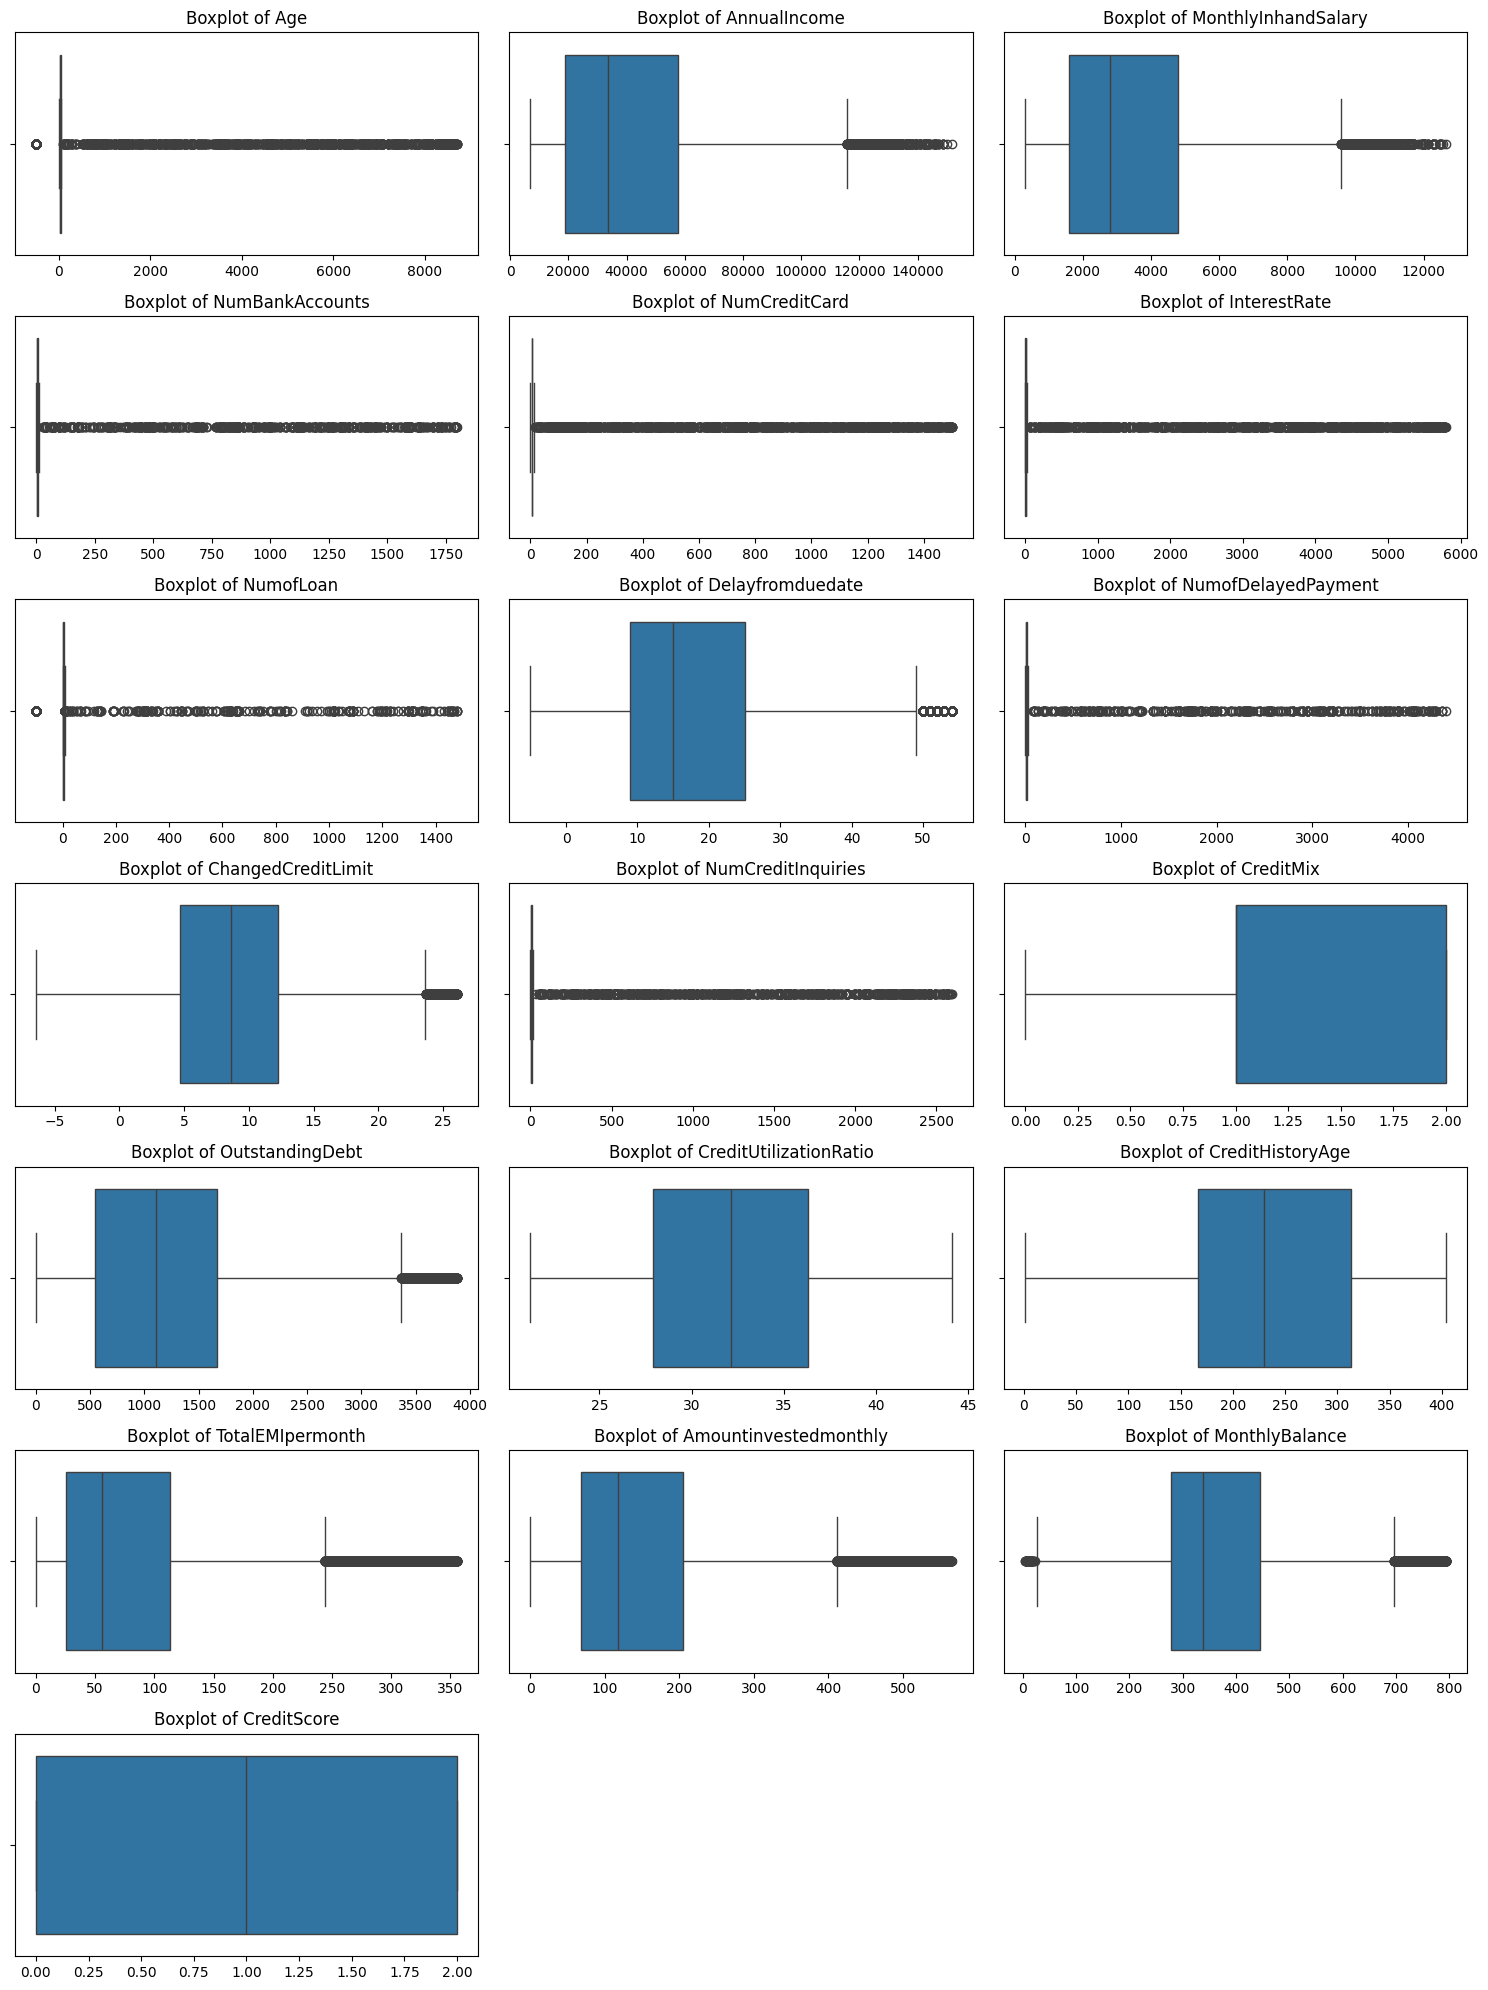

In [43]:
num_cols = 3

num_features = len(df.columns)
num_rows = (num_features - 1) // num_cols + 1

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 20))

# Flattenning the axes
axes = axes.ravel()

i = -1

for feature in df.columns:

    i += 1
    ax = axes[i]
    sns.boxplot(x=df[feature], ax = ax)
    ax.set_title(f'Boxplot of {feature}')
    ax.set_xlabel('')
    ax.set_ylabel('')
#     i += 1

#     ax = axes[i]
#     df[feature] = yeojohnson(df[feature])[0]
#     sns.histplot(df[feature], kde=True, ax=ax)
#     ax.set_title(f'Distribution of Transformed {feature}')
#     ax.set_xlabel('')
#     ax.set_ylabel('')

for i in range(num_features, num_cols * num_rows):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

In [44]:

df.reset_index(drop=True)

,Age,AnnualIncome,MonthlyInhandSalary,NumBankAccounts,NumCreditCard,InterestRate,NumofLoan,Delayfromduedate,NumofDelayedPayment,ChangedCreditLimit,NumCreditInquiries,CreditMix,OutstandingDebt,CreditUtilizationRatio,CreditHistoryAge,TotalEMIpermonth,Amountinvestedmonthly,MonthlyBalance,CreditScore
0,28,34847.84,3037.986667,2,4,6,1,3,4.0,5.42,2.0,1,605.03,24.464031,319,18.816215,104.291825,470.690627,2
1,54,30689.89,2612.490833,2,5,4,1,0,6.0,1.99,4.0,1,632.46,26.544229,207,16.415452,81.228859,433.604773,2
2,54,30689.89,2612.490833,2,5,4,1,5,3.0,1.99,4.0,1,632.46,35.279982,208,16.415452,124.881820,409.951812,2
3,55,30689.89,2612.490833,2,5,4,1,3,9.0,1.99,4.0,1,632.46,32.301163,209,16.415452,83.406509,411.427123,2
4,55,30689.89,2612.490833,2,5,4,1,7,6.0,-2.01,4.0,1,632.46,38.132348,210,16.415452,272.334037,262.499594,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68859,34,21709.07,2078.089167,3,4,8,0,7,0.0,11.52,3.0,1,1047.30,25.778423,289,0.000000,96.555743,371.253174,0
68860,20,66022.26,5382.855000,1,523,12,3,5,11.0,10.47,7.0,1,984.03,26.520567,307,94.496138,308.203296,405.586067,0
68861,52,45749.06,3600.421667,6,5,13,4,26,8.0,5.74,3.0,2,443.19,33.743778,277,110.254317,480.977109,58.810741,0
68862,27,33604.58,2987.381667,3,6,12,3,4,9.0,3.60,0.0,1,509.37,38.312085,270,79.047578,367.013329,142.677260,0


Text(0.5, 1.0, 'Boxplots for Multiple Columns')

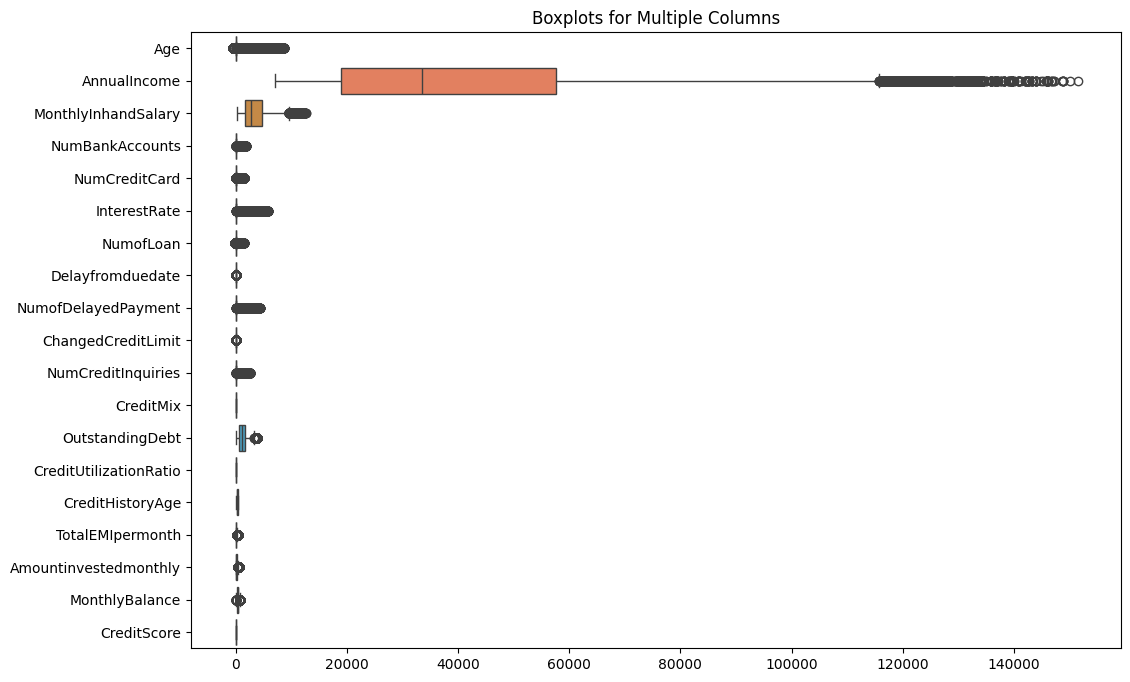

In [45]:
plt.figure(figsize=(12, 8))  # Adjust the figure size as needed

# Use Seaborn to create boxplots for all columns in df
sns.boxplot(data=df, orient='h')  # orient='h' for horizontal boxplots
plt.title('Boxplots for Multiple Columns')

**# Feature Scaling**

Scaling post outlier removal

In [46]:
df_without_outliers  = df.copy()

Text(0.5, 1.0, 'Boxplots for Multiple Columns')

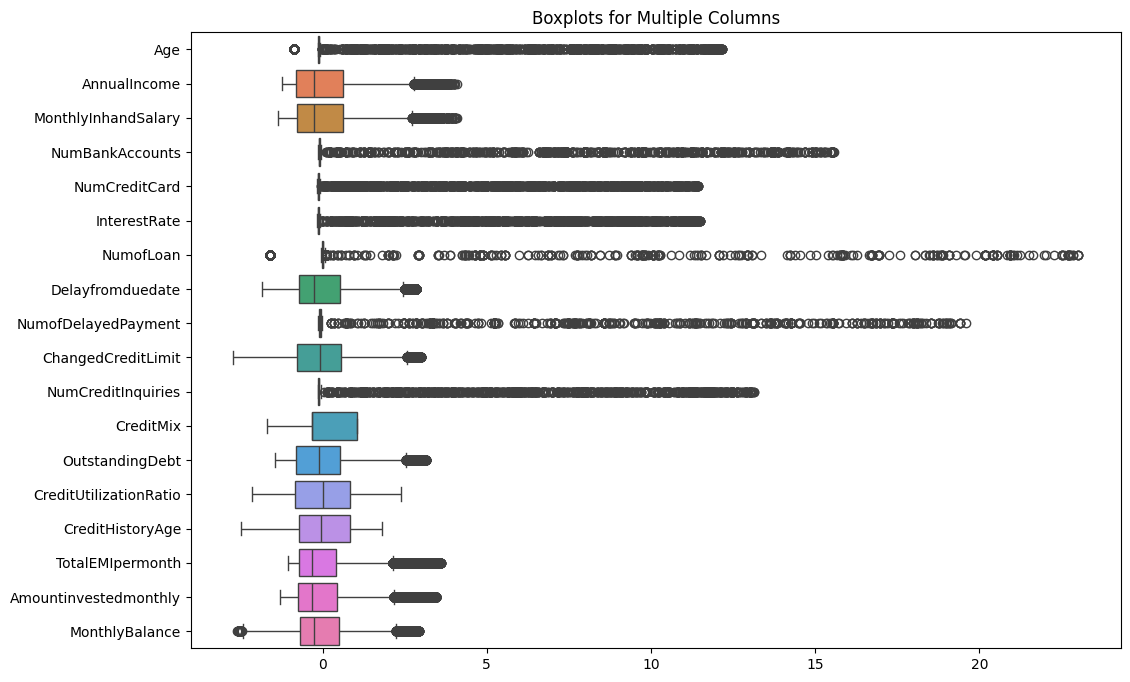

In [47]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(df_without_outliers.drop('CreditScore', axis = 1))
data_oversampled_normalized_without_outliers = sc.transform(df_without_outliers.drop('CreditScore', axis = 1))
data_oversampled_normalized_without_outliers = pd.DataFrame(data_oversampled_normalized_without_outliers, columns = df_without_outliers.drop('CreditScore', axis = 1).columns)

plt.figure(figsize=(12, 8))  # Adjust the figure size as needed

# Use Seaborn to create boxplots for all columns in df
sns.boxplot(data=data_oversampled_normalized_without_outliers, orient='h')  # orient='h' for horizontal boxplots
plt.title('Boxplots for Multiple Columns')

The outliers that are seen here might be containing some important inforamtion, due to which we have made the decision of not removing them.

In [48]:
data_oversampled_normalized_without_outliers = pd.DataFrame(data_oversampled_normalized_without_outliers, columns=df_without_outliers.columns.difference(['CreditScore']))

In [49]:
data_oversampled_normalized_without_outliers['CreditScore'] = df_without_outliers.reset_index()['CreditScore']

In [50]:
data_oversampled_normalized_without_outliers

,Age,Amountinvestedmonthly,AnnualIncome,ChangedCreditLimit,CreditHistoryAge,CreditMix,CreditUtilizationRatio,Delayfromduedate,InterestRate,MonthlyBalance,MonthlyInhandSalary,NumBankAccounts,NumCreditCard,NumCreditInquiries,NumofDelayedPayment,NumofLoan,OutstandingDebt,TotalEMIpermonth,CreditScore
0,-0.123788,-0.420626,-0.211976,-0.641259,0.896637,-0.319325,-1.523317,-1.199332,-0.143656,0.669674,-0.151355,-0.123455,-0.143076,-0.132084,-0.114989,-0.027646,-0.720950,-0.807682,2
1,-0.086913,-0.615306,-0.365410,-1.244138,-0.288774,-0.319325,-1.108235,-1.436516,-0.147678,0.410738,-0.339306,-0.123455,-0.135333,-0.121833,-0.106020,-0.027646,-0.688491,-0.839049,2
2,-0.086913,-0.246821,-0.365410,-1.244138,-0.278190,-0.319325,0.634895,-1.041209,-0.147678,0.245592,-0.339306,-0.123455,-0.135333,-0.121833,-0.119473,-0.027646,-0.688491,-0.839049,2
3,-0.085494,-0.596924,-0.365410,-1.244138,-0.267606,-0.319325,0.040502,-1.199332,-0.147678,0.255892,-0.339306,-0.123455,-0.135333,-0.121833,-0.092566,-0.027646,-0.688491,-0.839049,2
4,-0.085494,0.997858,-0.365410,-1.947204,-0.257022,-0.319325,1.204055,-0.883086,-0.147678,-0.783929,-0.339306,-0.123455,-0.135333,-0.121833,-0.106020,-0.027646,-0.688491,-0.839049,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68859,-0.115278,-0.485928,-0.696814,0.430917,0.579117,-0.319325,-1.261044,-0.883086,-0.139633,-0.024605,-0.575363,-0.114706,-0.143076,-0.126958,-0.132926,-0.043228,-0.197597,-1.053524,0
68860,-0.135134,1.300639,0.938401,0.246362,0.769629,-0.319325,-1.112956,-1.041209,-0.131589,0.215110,0.884426,-0.132205,3.875707,-0.106456,-0.083597,0.003519,-0.272466,0.181108,0
68861,-0.089749,2.759064,0.190293,-0.585014,0.452108,1.058493,0.328361,0.619081,-0.129578,-2.206098,0.097085,-0.088458,-0.135333,-0.126958,-0.097051,0.019101,-0.912460,0.386995,0
68862,-0.125206,1.797068,-0.257854,-0.961154,0.378020,-0.319325,1.239920,-1.120271,-0.131589,-1.620536,-0.173708,-0.114706,-0.127590,-0.142335,-0.092566,0.003519,-0.834147,-0.020734,0


In [51]:

df2 = data_oversampled_normalized_without_outliers.copy()

In [52]:

df2

,Age,Amountinvestedmonthly,AnnualIncome,ChangedCreditLimit,CreditHistoryAge,CreditMix,CreditUtilizationRatio,Delayfromduedate,InterestRate,MonthlyBalance,MonthlyInhandSalary,NumBankAccounts,NumCreditCard,NumCreditInquiries,NumofDelayedPayment,NumofLoan,OutstandingDebt,TotalEMIpermonth,CreditScore
0,-0.123788,-0.420626,-0.211976,-0.641259,0.896637,-0.319325,-1.523317,-1.199332,-0.143656,0.669674,-0.151355,-0.123455,-0.143076,-0.132084,-0.114989,-0.027646,-0.720950,-0.807682,2
1,-0.086913,-0.615306,-0.365410,-1.244138,-0.288774,-0.319325,-1.108235,-1.436516,-0.147678,0.410738,-0.339306,-0.123455,-0.135333,-0.121833,-0.106020,-0.027646,-0.688491,-0.839049,2
2,-0.086913,-0.246821,-0.365410,-1.244138,-0.278190,-0.319325,0.634895,-1.041209,-0.147678,0.245592,-0.339306,-0.123455,-0.135333,-0.121833,-0.119473,-0.027646,-0.688491,-0.839049,2
3,-0.085494,-0.596924,-0.365410,-1.244138,-0.267606,-0.319325,0.040502,-1.199332,-0.147678,0.255892,-0.339306,-0.123455,-0.135333,-0.121833,-0.092566,-0.027646,-0.688491,-0.839049,2
4,-0.085494,0.997858,-0.365410,-1.947204,-0.257022,-0.319325,1.204055,-0.883086,-0.147678,-0.783929,-0.339306,-0.123455,-0.135333,-0.121833,-0.106020,-0.027646,-0.688491,-0.839049,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68859,-0.115278,-0.485928,-0.696814,0.430917,0.579117,-0.319325,-1.261044,-0.883086,-0.139633,-0.024605,-0.575363,-0.114706,-0.143076,-0.126958,-0.132926,-0.043228,-0.197597,-1.053524,0
68860,-0.135134,1.300639,0.938401,0.246362,0.769629,-0.319325,-1.112956,-1.041209,-0.131589,0.215110,0.884426,-0.132205,3.875707,-0.106456,-0.083597,0.003519,-0.272466,0.181108,0
68861,-0.089749,2.759064,0.190293,-0.585014,0.452108,1.058493,0.328361,0.619081,-0.129578,-2.206098,0.097085,-0.088458,-0.135333,-0.126958,-0.097051,0.019101,-0.912460,0.386995,0
68862,-0.125206,1.797068,-0.257854,-0.961154,0.378020,-0.319325,1.239920,-1.120271,-0.131589,-1.620536,-0.173708,-0.114706,-0.127590,-0.142335,-0.092566,0.003519,-0.834147,-0.020734,0


# 1. Logistic Regression

**1. Splitting the dataset**

In [53]:
X = df2.drop('CreditScore', axis=1)
y = df2['CreditScore']

In [54]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**2. Training the logistic Regression Model**

In [55]:
from sklearn.linear_model import LogisticRegression

# Using the One vs Rest approach
logistic_regression_model_ovr = LogisticRegression(multi_class='ovr', max_iter=1000)
logistic_regression_model_ovr.fit(X_train, y_train)
y_pred_ovr = logistic_regression_model_ovr.predict(X_test)

# using the Multinomial Regression employing the softmax approach
logistic_regression_model_multinomial = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
logistic_regression_model_multinomial.fit(X_train, y_train)
y_pred_multinomial = logistic_regression_model_multinomial.predict(X_test)

**3. Evaluation Metrics**

In [56]:
from sklearn.metrics import accuracy_score, confusion_matrix

# Evaluating the One vs Rest Model
print("OvR Model:")
print(f'Accuracy: {accuracy_score(y_test, y_pred_ovr):.2f}')

# Evaluating the Softmax (Multinomial) Model
print("\nSoftmax (Multinomial) Model:")
print(f'Accuracy: {accuracy_score(y_test, y_pred_multinomial):.2f}')

OvR Model:
Accuracy: 0.71

Softmax (Multinomial) Model:
Accuracy: 0.71


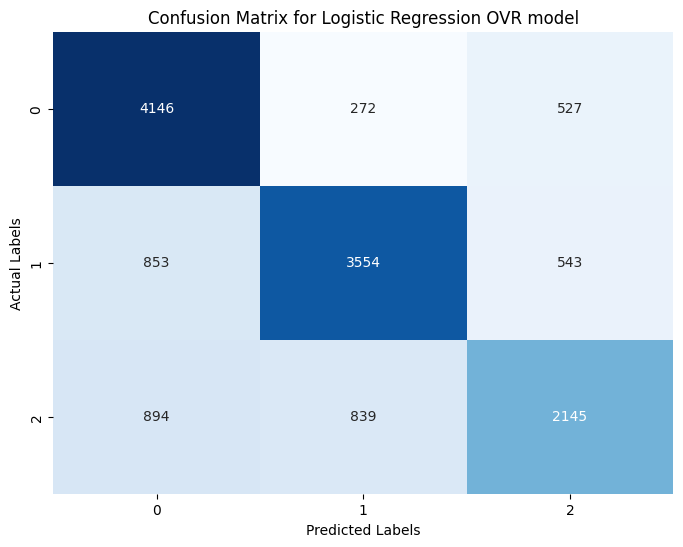

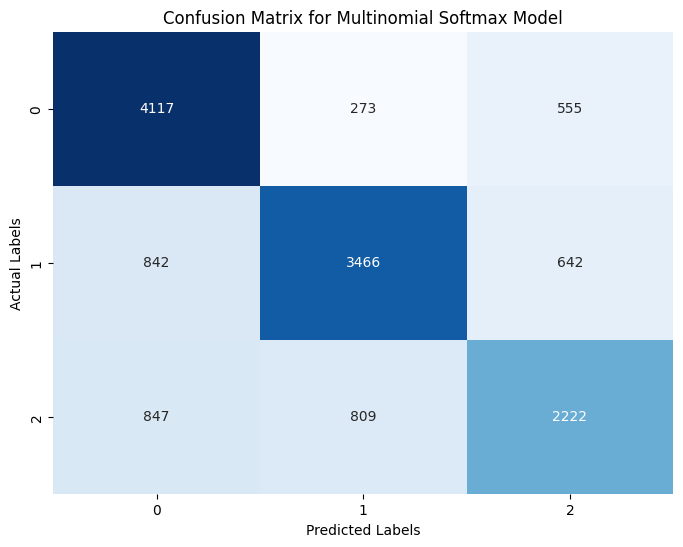

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_ovr), annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix for Logistic Regression OVR model')
plt.show()

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_multinomial), annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix for Multinomial Softmax Model')
plt.show()

#2. Naive Bayes

**1. Splitting the Dataset**

In [58]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import MultinomialNB

# Splitting the dataset
X = df2.drop('CreditScore', axis=1)
y = df2['CreditScore']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

2. Scaling the negative values in the dataset

In [61]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

3. Fitting the model and Predicting

In [62]:
naive_bayes_model = MultinomialNB()
naive_bayes_model.fit(X_train_scaled, y_train)
y_pred = naive_bayes_model.predict(X_test_scaled)

4. Evaluating the Model

In [63]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.62


5. Plotting the Confusion Matrix

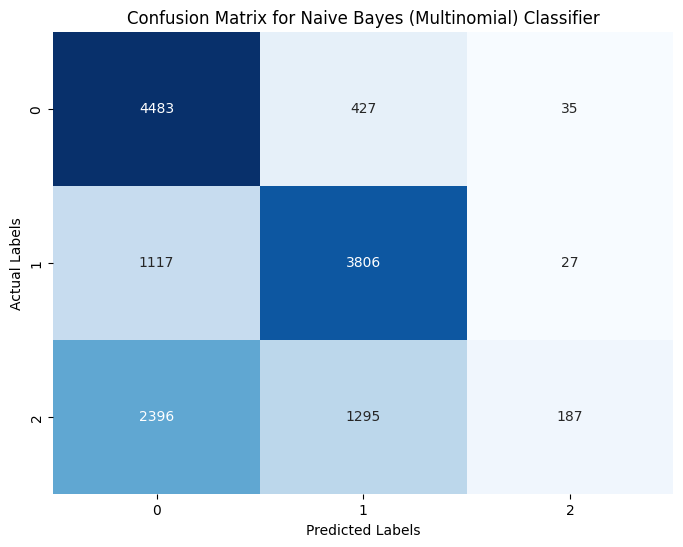

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns

confusion = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix for Naive Bayes (Multinomial) Classifier')
plt.show()

# 3. KNN Model

1. Splitting the Dataset

In [65]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X = df2.drop('CreditScore', axis=1)
y = df2['CreditScore']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

2. Fitting the Model and Predicting

In [66]:
from sklearn.metrics import classification_report
knn_model = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors (k) as needed
knn_model.fit(X_train, y_train)
y_pred = knn_model.predict(X_test)

3. Evaluation Metrics

In [67]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print(classification_report(y_test, y_pred))

Accuracy: 0.78
              precision    recall  f1-score   support

           0       0.78      0.93      0.85      4945
           1       0.79      0.84      0.81      4950
           2       0.78      0.53      0.63      3878

    accuracy                           0.78     13773
   macro avg       0.78      0.77      0.76     13773
weighted avg       0.78      0.78      0.77     13773



4. Plotting the Confusion Matrix

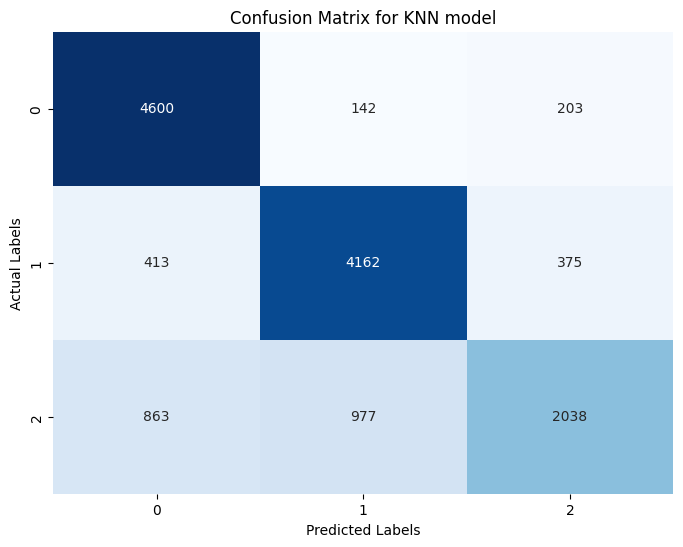

In [68]:
confusion = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix for KNN model')
plt.show()

# 5. Random Forrest

1. Splitting the dataset

In [69]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X = df2.drop('CreditScore', axis=1)
y = df2['CreditScore']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

2. Fitting the model and Predicting

In [70]:
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)  # You can adjust hyperparameters as needed
random_forest_model.fit(X_train, y_train)
y_pred = random_forest_model.predict(X_test)

3. Evaluating the Model

In [71]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print(classification_report(y_test, y_pred))

Accuracy: 0.92
              precision    recall  f1-score   support

           0       0.93      0.99      0.96      4945
           1       0.90      0.98      0.94      4950
           2       0.96      0.77      0.86      3878

    accuracy                           0.92     13773
   macro avg       0.93      0.91      0.92     13773
weighted avg       0.93      0.92      0.92     13773



4. Plotting the Confusion Matrix

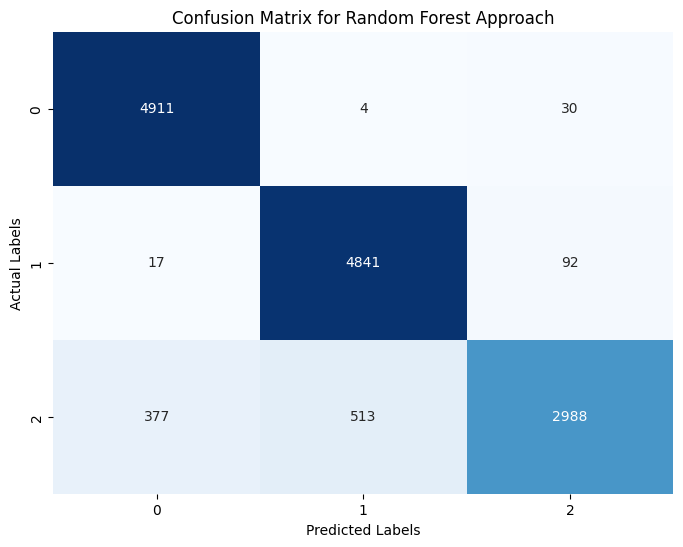

In [72]:
confusion = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix for Random Forest Approach')
plt.show()